<H1> Test efficiency of Single Muon trigger on Double muon event </H1>

In [1]:
import os, sys, csv, string

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<H3> Throw toys for the 2 trigger paths </H3>

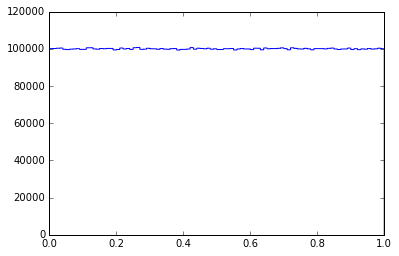

In [23]:
trigger1 = np.random.rand(10000000)
QbgHist = hist(trigger1,histtype='step',bins=100)

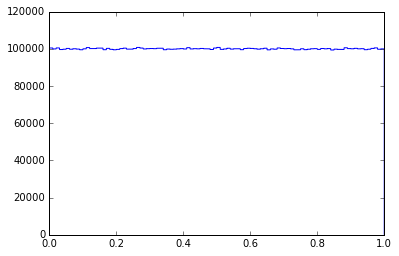

In [24]:
trigger2 = np.random.rand(10000000)
QbgHist = hist(trigger2,histtype='step',bins=100)


In [27]:
trigger3 = np.random.rand(10000000)
trigger4 = np.random.rand(10000000)
randomChoice = np.random.rand(10000000)



<H4>Test the efficency of trigger 1 </H4>

In [5]:
passtrigger1=0
for i in trigger1:
    if (i<0.8): #cut at 0.8 emulate 80% efficiency 
        passtrigger1 = passtrigger1 + 1

efficiency1=passtrigger1/1000000
print(efficiency1)

0.799784


<H4>Efficiency of Single Muon path on Double muon events (no correlation) </H4> 

In [6]:
passBothTriggers=0
passTrigger1=0
passTrigger2=0
for n in range(0,len(trigger1)-1):
    if trigger1[n] <0.7: #70% effic
        passTrigger1=1
    else:
        passTrigger1=0
    if trigger2[n] <0.8:
        passTrigger2=1
    else:
        passTrigger2=0
   # if passTrigger1:
   #     passTrigger2=0
    if passTrigger1 or passTrigger2 :
        passBothTriggers = passBothTriggers + 1

efficiencyBoth=passBothTriggers/1000000
print(efficiencyBoth)

0.939958


<H4>Efficiency of Single Muon path on Double muon events </H4> 

In [14]:
passBothTriggers=0
passTrigger1=0
passTrigger2=0
for n in range(0,len(trigger1)-1):
    if trigger1[n] <0.72: #70% effic
        passTrigger1=1
    else:
        passTrigger1=0
    if trigger2[n] <0.72:
        passTrigger2=1
    else:
        passTrigger2=0
    if passTrigger1: #if path fired then the second cannot be passed 
        passTrigger2=0 
    if passTrigger1 or passTrigger2 :
        passBothTriggers = passBothTriggers + 1

efficiencyBoth=passBothTriggers/1000000
error = sqrt(passBothTriggers)/1000000
print(efficiencyBoth, error)

0.921617 0.000960008854126


<h3> Now add HLT ineff in the game <h3>

In [94]:
passBothTriggers=0
passOneL1=0
passTrigger1L1=0
passTrigger1HLT=0
passTrigger1=0
passTrigger2L1=0
passTrigger2HLT=0

for n in range(0,10000000):
    passTrigger1=0
    passTrigger2=0


    if trigger1[n] <0.8: #70% effic
        passTrigger1L1=1
    else:
        passTrigger1L1=0
    if trigger3[n] <0.9: #70% effic
        passTrigger1HLT=1
    else:
        passTrigger1HLT=0

    if trigger2[n] <0.6:
        passTrigger2L1=1
    else:
        passTrigger2L1=0
    if trigger4[n] <0.7:
        passTrigger2HLT=1
    else:
        passTrigger2HLT=0
 #   if(passTrigger1L1):
 #       passTrigger2L1=0
    if (passTrigger1L1 and passTrigger1HLT):
        passTrigger1=1
    if (passTrigger2L1 and passTrigger2HLT):
        passTrigger2=1
    if (passTrigger1L1 and passTrigger2L1):
        if (randomChoice[n]>0.5):
            passTrigger1 = 0
        else:
            passTrigger2 = 0
#    if(passTrigger1L1):
#        passTrigger2=0
    if (passTrigger1L1 and not passTrigger2L1) or (not passTrigger1L1 and passTrigger2L1):
         passOneL1 = passOneL1 +1
    if passTrigger1 or passTrigger2 :
        passBothTriggers = passBothTriggers + 1
#    if not (passTrigger1 or passTrigger2):
#        print("L1",passTrigger1L1,passTrigger2L1)
#        print("HLT",passTrigger1HLT,passTrigger2HLT)
#        print("path",passTrigger1,passTrigger2)



efficiencyBoth=passBothTriggers/10000000
efficiencyOneL1 = passOneL1/10000000
print(efficiencyBoth)
print(efficiencyOneL1)

0.7561773
0.4400714


In [84]:
1-(1-0.8*0.9)*(1-0.6*0.7)

0.8376

In [77]:
0.8*0.9*(2-0.8)

0.8640000000000001

In [93]:
0.6*0.7+0.8*0.9-0.5*(0.6*0.7*0.8+0.8*0.9*0.6)

0.7560000000000001

In [70]:
nExp=0
nFailHLT=0
for n in range(0,len(trigger1)-1):
    passL1=0
    passHLT=0
    passTrigger=0
    if (trigger1[n] <0.8):
        passL1 = 1
    if (trigger2[n] <0.9):
        passHLT = 1
    if (passL1 and passHLT):
        passTrigger=1
    if (not passTrigger):
        nExp = nExp+1
        if (not passHLT):
            nFailHLT=nFailHLT+1
probaHLTfail=1.*nFailHLT/nExp
print (nFailHLT,nExp)
print(probaHLTfail)
            


999985 2799979
0.3571401785513391


In [22]:
(1-0.9)/(1-0.8*0.9)

0.35714285714285715

In [66]:
1-((1-0.8)*(1-0.8)+2*0.8*0.8*(1-0.9)*0.9)

0.8448

In [68]:
2*0.8*0.2

0.32000000000000006